# 2D transformations

Often a 2D image transformation is also called an image warp.



# Translation. 
Translation is the shifting of object’s location. It performs geometric transformation by mapping the pixels in an input image into a new position in an output image. Translation shifts image along the x and y axis.
# 2D translations
 Let us consider the $2D$ point $P = (x, y)$ transformed to $\acute{P} = (\acute{x}, \acute{y})$,
such that


$$x^{'}=x+t_{x} $$
$$y^{'}=y+t_{y} $$

and can be written as $\acute{x} = x + t$ or
$$ \acute{P}=\begin{bmatrix}
I & t \end{bmatrix} \bar{x} $$

where where $I$ is the (2 × 2) identity matrix or
$$ \acute{p}=\left[ \begin{array}{ccc}
1 & 0& t_{x} \\
0&1&t_{y}
\end{array} \right] \bar{x} $$


where $(t_{x}, t_{y})$ is the Translation vector and

$t_{x}$ defines the distance the X coordinate has to be moved.

$t_{y}$ defines the distance the Y coordinate has to be moved.


The homogeneous coordinates representation of  $\acute{P}$ is given as $$\acute{x}=\left [ \begin{array}{ccc} 
                 1 &0&t_{x}\\
                 0&1&t_{y}\\
                  0&0&1 \end{array} \right] \bar{x} $$
                  


where $t_{x}$ is the number of pixels we will shift left or right. Negative values of $t_{x}$ will shift the
image to the left and positive values will shift the image to
the right.
$t_{y}$ is the number of pixels we will shift the image top or down.




In [108]:
import numpy as np
import cv2 as c2
import skimage
import skimage.transform as sk_transforms
import matplotlib.pyplot as plt
import numpy as np
import scipy
import skimage.data as sk_data
plt.ion()

In [109]:
plt.rcParams['image.cmap']='gray'

In [42]:
c2.__version__,skimage.__version__,np.__version__

('4.5.5', '0.19.1', '1.22.2')

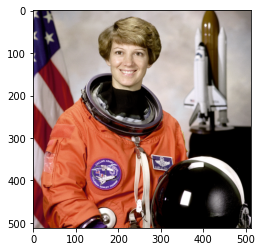

In [43]:
img=sk_data.astronaut()
plt.imshow(img)

In [44]:
img.shape[:2]

(512, 512)

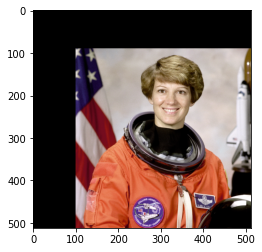

In [45]:
# opencv
Trans_matrix=np.float64 ([[1,0,100],[0,1,90]]) 
trans_img=c2.warpAffine(img,Trans_matrix,(img.shape[:2]))
plt.imshow(trans_img)

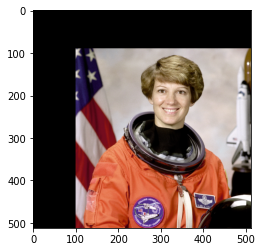

In [46]:
trans=sk_transforms.SimilarityTransform(translation=(-100,-90))
trans_img1=sk_transforms.warp(img,trans)
plt.imshow(trans_img1)

# Rotation
Let consider a point $P = (x, y)$ being rotated by an angle $\theta$  to be transformed to the point $\acute{P} = (\acute{x},\acute{y})$.

Consider the point $P$ in polar coordinates given by the length $r$ and angle $\phi$.
$P$ is then expressed as

$$x=rcos(\phi)$$
$$y=rsin(\phi) $$
we can express the rotation using the equations
$$\acute{x}=rcos(\theta + \phi)=rcos(\theta)cos(\phi)-rsin(\theta)sin(\phi)$$
$$=xcos(\theta)-ysin(\theta) $$
$$ \acute{y}=rsin(\theta + \phi) =rsin(\theta)cos(\phi) + rcos(\theta)sin(\phi)$$
$$=xsin(\theta) + ycos(\theta) $$

$$\acute{P}=\left[ \begin{array}{cc}
cos\ \theta &-sin\ \theta\\
 sin\ \theta & cos\ \theta
\end{array}\right ]\left[  \begin{array}{c}
x\\
 y\end{array}\right ]$$
 
 For homogeneous coordinates, the above rotation matrix may be represented as a 3 x 3 matrix
as

$$\acute{P}=\begin{bmatrix} \acute{x}\\ \acute{y} \\ 1 \end{bmatrix}=\left[ \begin{array}{cc}
cos\ \theta &-sin\ \theta &0\\
 sin\ \theta & cos\ \theta &0\\
 0&0&1
\end{array}\right ]\left[  \begin{array}{c}
x\\
 y\\ 1\end{array}\right ]$$

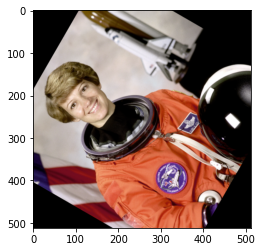

In [47]:
# angle : float Rotation angle in degrees in counter-clockwise direction.
ro=sk_transforms.rotate(img,angle=60)
plt.imshow(ro)

using opencv

\begin{bmatrix} \alpha &  \beta & (1- \alpha )  \cdot \texttt{center.x} -  \beta \cdot \texttt{center.y} \\ - \beta &  \alpha &  \beta \cdot \texttt{center.x} + (1- \alpha )  \cdot \texttt{center.y} \end{bmatrix}

\begin{array}{l} \alpha =  \texttt{scale} \cdot \cos \texttt{angle} , \\ \beta =  \texttt{scale} \cdot \sin \texttt{angle} \end{array}\

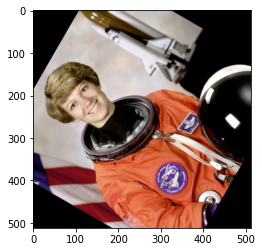

In [48]:
rows,cols=img.shape[0],img.shape[1]
M=c2.getRotationMatrix2D(center=(cols/2 ,rows/2),angle=60,scale=1)
rotate1=c2.warpAffine(img,M,(rows,cols))
plt.imshow(rotate1)

# Scaling
Scaling is just resizing of the image.it is a process of modifying the size (resizing) of objects.OpenCV comes with a function cv2.resize() for this purpose . Scaling of a point by a factor $S_{x}$ and $S_{y}$ along the $x$ and $y$ direction , respectively can be respresented in the matrix form as

$$ \acute{P}=\begin{bmatrix} S_{X}&O\\
0 & S_{Y}\end{bmatrix} \begin{bmatrix} x\\ y \end{bmatrix} $$

In [49]:
rescale=sk_transforms.rescale(img,1.1)

In [50]:
print(img.size)
print(rescale.size)

786432
950907


In [51]:
print(rescale.shape)
print(img.shape)

(563, 563, 3)
(512, 512, 3)


(300, 300, 3)


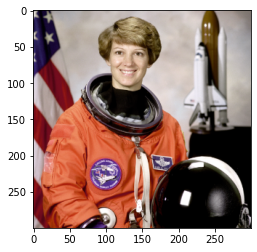

In [52]:
res1=sk_transforms.resize(img,(300,300))
plt.imshow(res1)
print(res1.shape)

In [53]:
down_size=(300,300)
rescale_down=c2.resize(img,down_size)
print(rescale_down.shape)

(300, 300, 3)


# Isometries
Isometries are transformations of the plane $R^{2}$ that preserve Euclidean distance (from
iso = same, metric = measure). An isometry is represented as


$$ \begin{array}{c}\acute{x}\\ \acute{y} \\1  \end{array}=  \begin{bmatrix} \epsilon cos\theta & -sin\theta & t_{x}\\
\epsilon sin\theta & cos\theta & t_{y}\\
0&0&1\end{bmatrix} \left( \begin{array}{c} x\\y\\1\end{array}\right)$$

where $\epsilon = ±1$. If $\epsilon = 1$ then the isometry is orientation-preserving and is a **Euclidean
transformation (a composition of a translation and rotation)**. If $\epsilon = −1$ then the isometry reverses orientation. An example is the composition of a reflection, represented by the matrix diag(−1, 1, 1), with a Euclidean transformation.**Euclidean transformations model the motion of a rigid object**


>Richard Hartley and Andrew Zisserman: " Multiple View Geometry in Computer Vision
Second Edition", Chapter 2 section 2.4.1

# Rotation + translation  
**is also known as 2D rigid body motion or the 2D Euclidean transformation (since Euclidean distances are preserved) or also  rigid transformation**, and can be written more concisely  as

$$\acute{x}=\begin{bmatrix}R & t \end{bmatrix} \bar{x} $$ where $R$ is a $2 × 2$ rotation matrix (an orthogonal matrix such that $R^{T}R = RR^{T} = I$ ) and $t$ a translation 2-vector

$$R=\left[ \begin{array}{cc}
cos \ \theta &-sin\ \theta\\
 sin\ \theta & cos\ \theta
\end{array}\right ]$$

 For homogeneous coordinates, it can be represented as a 3 x 3 matrix
as
$$ \begin{array}{c}\acute{x}\\ \acute{y} \\1  \end{array}=  \begin{bmatrix}  cos\theta & -sin\theta & t_{x}\\
 sin\theta & cos\theta & t_{y}\\
0 & 0 & 1 \end{bmatrix} \left( \begin{array}{c} x \\ y \\ 1\end{array}\right)$$

A Euclidean transformation is also known as a displacement

<b>The condition that defines a rigid object is that the distance between any two points on it does not change over time as the object moves.  Distances and orientations are preserved in a rigid motion and this means that individual points (pixels) cannot translate relative to each other. <b>

Now let’s apply this transformation to an image. Because we are trying to reconstruct the image after transformation, it is not useful to see where a coordinate from the input image ends up in the output, which is what the transform gives us. Instead, for every pixel (coordinate) in the output image, we want to figure out where in the input image it comes from. Therefore, we need to use the inverse of tform, rather than tform directly.

[Types of homographies](https://scikit-image.org/docs/dev/auto_examples/transform/plot_transform_types.html#:~:text=A%20Euclidean%20transformation%2C%20also%20called,origin%20followed%20by%20a%20translation.)

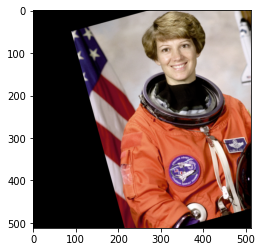

In [54]:
def Rigid2D_sk(image,trans_vector=(1,2),angle=1):
    trans_mat=sk_transforms.EuclideanTransform(rotation=angle,translation=trans_vector)
    return sk_transforms.warp(image,trans_mat.inverse)
a=Rigid2D_sk(img,trans_vector=(90,50),angle=50)
plt.imshow(a)

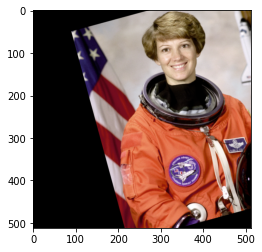

In [55]:
def Rigid2D(image,trans_vector=(1,2),angle=1):
    w,h=image.shape[:2]
    tx=trans_vector[0]
    ty=trans_vector[1]
    ca=np.cos(angle)
    sa=-np.sin(angle)
    rotate_mat=np.array([[ca,-sa,0],[sa,ca,0],[0,0,1]])
    rotate_mat=np.linalg.inv(rotate_mat)
    rotate_mat=rotate_mat[:-1,:]
    trans_mat=np.array([[0,0,tx],[0,0,ty]],dtype=np.float32)
    ma=rotate_mat+trans_mat
    return c2.warpAffine(image,ma,(h,w))
a=Rigid2D(img,trans_vector=(90,50),angle=50)
plt.imshow(a)

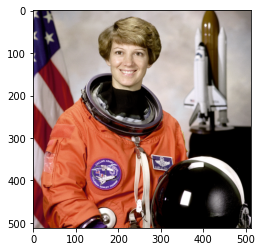

In [56]:
plt.imshow(img)

#  Similarity transformation (Scaled rotation.)
A similarity transformation. A similarity has matrix representation
$$\acute{x}=\begin{bmatrix}sR & t \end{bmatrix} \bar{x} $$ where $R$ is a $2 × 2$ and $s$ is an arbitrary scale factor

$$sR=\left[ \begin{array}{cc}
s\cos \ \theta &-s\sin\ \theta\\
 s\ sin\ \theta & s \cos\ \theta
\end{array}\right ]$$

 For homogeneous coordinates, it can be represented as a 3 x 3 matrix
as
$$ \begin{array}{c}\acute{x}\\ \acute{y} \\1  \end{array}=  \begin{bmatrix}  s \ cos\theta & -s \ sin\theta & t_{x}\\
 s \ sin\theta & s \ cos\theta & t_{y}\\
0 & 0 & 1 \end{bmatrix} \left( \begin{array}{c} x \\ y \\ 1\end{array}\right)$$

A similarity transformation is also
known as an equi-form transformation, because it preserves “shape” (form). 

In [57]:
def Similarity_transformation(image,trans_vector=(1,2),angle=1,s=1):
    h,w=image.shape[:2]
    tx=trans_vector[0]
    ty=trans_vector[1]
    ca=s*np.cos(angle)
    sa=s*np.sin(angle)
    rotate_mat=np.array([[ca,-sa,0],[sa,ca,0],[0,0,1]])
    rotate_mat=np.linalg.inv(rotate_mat)
    rotate_mat=rotate_mat[:-1,:]    
    trans_mat=np.array([[0,0,tx],[0,0,ty]],dtype=np.float32)
    ma=rotate_mat+trans_mat
    return c2.warpAffine(image,ma,(h,w))

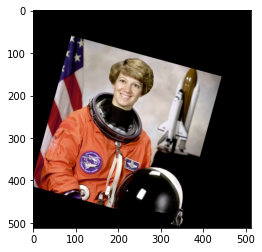

In [58]:
a=Similarity_transformation(img,trans_vector=(90,60),angle=50,s=1.4)
plt.imshow(a)

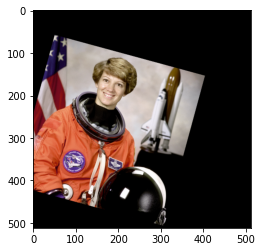

In [59]:
m=sk_transforms.SimilarityTransform(translation=(-90,-60),rotation=50,scale=1.4)
result=sk_transforms.warp(img,m)
plt.imshow(result)

# Affine transformations
An affine transformation  is a non-singular linear transformation followed by a translation and has the matrix representation

$$ \begin{array}{c}\acute{x}\\ \acute{y} \\1  \end{array}=  \begin{bmatrix}   a_{11}&  a_{1,2} & t_{x}\\
a_{2,1} & a_{2,2} & t_y\\
0 & 0 & 1 \end{bmatrix} \left( \begin{array}{c} x \\ y \\ 1\end{array}\right)$$

In affine transformation, all parallel lines in the original image will still be parallel in the output image

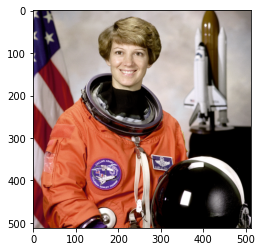

In [75]:
plt.imshow(img)

In [76]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

In [77]:
rows,cols,ch = img.shape
M1=sk_transforms.AffineTransform()
M1.estimate(pts1,pts2)
dst1=sk_transforms.warp(img,M1.inverse)
M = c2.getAffineTransform(pts1,pts2)
dst = c2.warpAffine(img,M,(cols,rows))

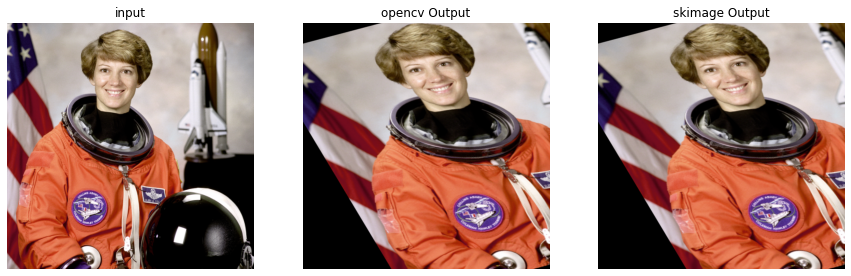

In [78]:
imgs=[img,dst,dst1]
titles=['input','opencv Output', 'skimage Output']

f,axes=plt.subplots(nrows=1,ncols=3,figsize=(15,10))
for ax in axes:
    ax.axis('off')
for i,img in enumerate(imgs):
    axes[i].imshow(imgs[i])
    axes[i].set_title(titles[i])

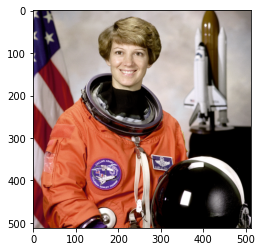

In [79]:
img=sk_data.astronaut()
plt.imshow(img)

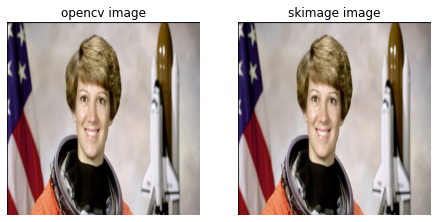

In [80]:
mat=np.array([[1,0,2],[0,2,3]],dtype=np.float32)
mat1=np.array([[1,0,2],[0,2,3],[0,0,1]],dtype=np.float32)
w,h=img.shape[:2]
affine_res=c2.warpAffine(img,mat,(w,h))
#skimage
m=sk_transforms.AffineTransform(mat1)
img_sk=sk_transforms.warp(img,m.inverse)
plt.figure(figsize=(20,15))

plt.subplot(151),plt.imshow(affine_res),plt.title('opencv image'),plt.axis('off')
plt.subplot(152),plt.imshow(img_sk),plt.title('skimage image'),plt.axis('off')
plt.show()

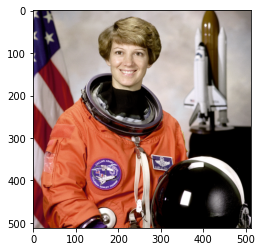

In [82]:
plt.imshow(img)

# perspective transform or homography, 
transformation of form 

$$ \begin{array}{c}\acute{x}\\ \acute{y} \\ \acute{z}  \end{array}=  \begin{bmatrix}  h_{11} & h_{12} & h_{13}\\
 h_{21} & h_{22} & h_{23}\\
h_{31} & h_{32} & h_{33} \end{bmatrix} \left( \begin{array}{c} x \\ y \\ z\end{array}\right)$$
can be represented compactly as
$$ \acute{x}=Hx $$

$H$ is a projective matrix also called <b> Homography</b>
it preserve straightness 


Straight lines will remain straight even after
the transformation

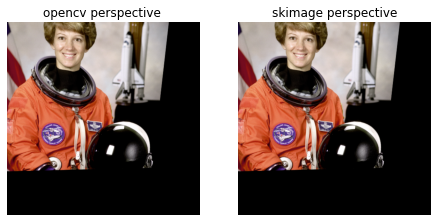

In [125]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
destination=c2.getPerspectiveTransform(pts1,pts2)
per_img_c=c2.warpPerspective(img,destination,(img.shape[:2]))
# skimage
per_mat=sk_transforms.ProjectiveTransform()
per_mat.estimate(pts1,pts2)
per_img_sk=sk_transforms.warp(img,per_mat.inverse,output_shape=img.shape[:2])

plt.figure(figsize=(20,15))
plt.subplot(151),plt.imshow(per_img_c),plt.title('opencv perspective '),plt.axis('off')
plt.subplot(152),plt.imshow(per_img_sk),plt.title('skimage perspective'),plt.axis('off')
plt.show()

![](./img/project.jpg)
[Richard Hartley and Andrew Zisserman: " Multiple View Geometry in Computer Vision
Second Edition", Chapter 2](https://www.amazon.com/Multiple-View-Geometry-Computer-Vision/dp/0521540518)

![](./img/project1.jpg)
[Richard Szeliski: "Computer Vision Algorithms and Applications, Chapter 2"](https://www.amazon.com/Computer-Vision-Algorithms-Applications-Science/dp/1848829345/ref=pd_sbs_1/142-1228447-9481704?pd_rd_w=7yQjK&pf_rd_p=3676f086-9496-4fd7-8490-77cf7f43f846&pf_rd_r=M5VRKH2BXG7CQZEVP2TS&pd_rd_r=ff58856e-9fee-470f-8abf-3c5c89218b48&pd_rd_wg=a2m1X&pd_rd_i=1848829345&psc=1)

# Projective transformations

Also known as a 3D perspective transform, homography, or collineation, operates on homogeneous coordinates.

projective transformation is a general non-singular linear transformation of homogeneous coordinates that generalizes an affine transformation. affine transformation is the composition of a general non-singular linear transformation of inhomogeneous coordinates and a translation.

The matrix has nine elements with only their ratio significant, so the transformation is specified by eight parameters. N


## Perspective transformations preserve straight lines


